## Data Science Job Salaries



 - __work_year__: The year was paid.
 - __experience_level__: The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
 - __employment_type__: The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
 - __job_title__: The role worked in during the year.
 - __salary__: The total gross salary amount paid.
 - __salary_currency__: The currency of the salary paid as an ISO 4217 currency code.
 - __salary_in_usd__: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
 - __employee_residence__: Employee's primary country of residence in during the work year as an ISO 3166 country code.
 - __remote_ratio__: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
- __company_location__: The country of the employer's main office or contracting branch as an ISO 3166 country code.
 - __company_size__: The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)



In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
df = pd.read_csv('ds_salaries.csv')


### Info

In [10]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


There is no nulll values in the data

In [5]:
df.shape

(607, 12)

In [7]:
df.duplicated().sum()

0

No Duplicated values, but the first column is unknown so I'll delete it

In [76]:
df.drop(columns = 'Unnamed: 0',inplace = True)

In [78]:
df.to_csv('DS_salaries_cleaned.csv', index=False)

## EDA

### Distribution of categorical values

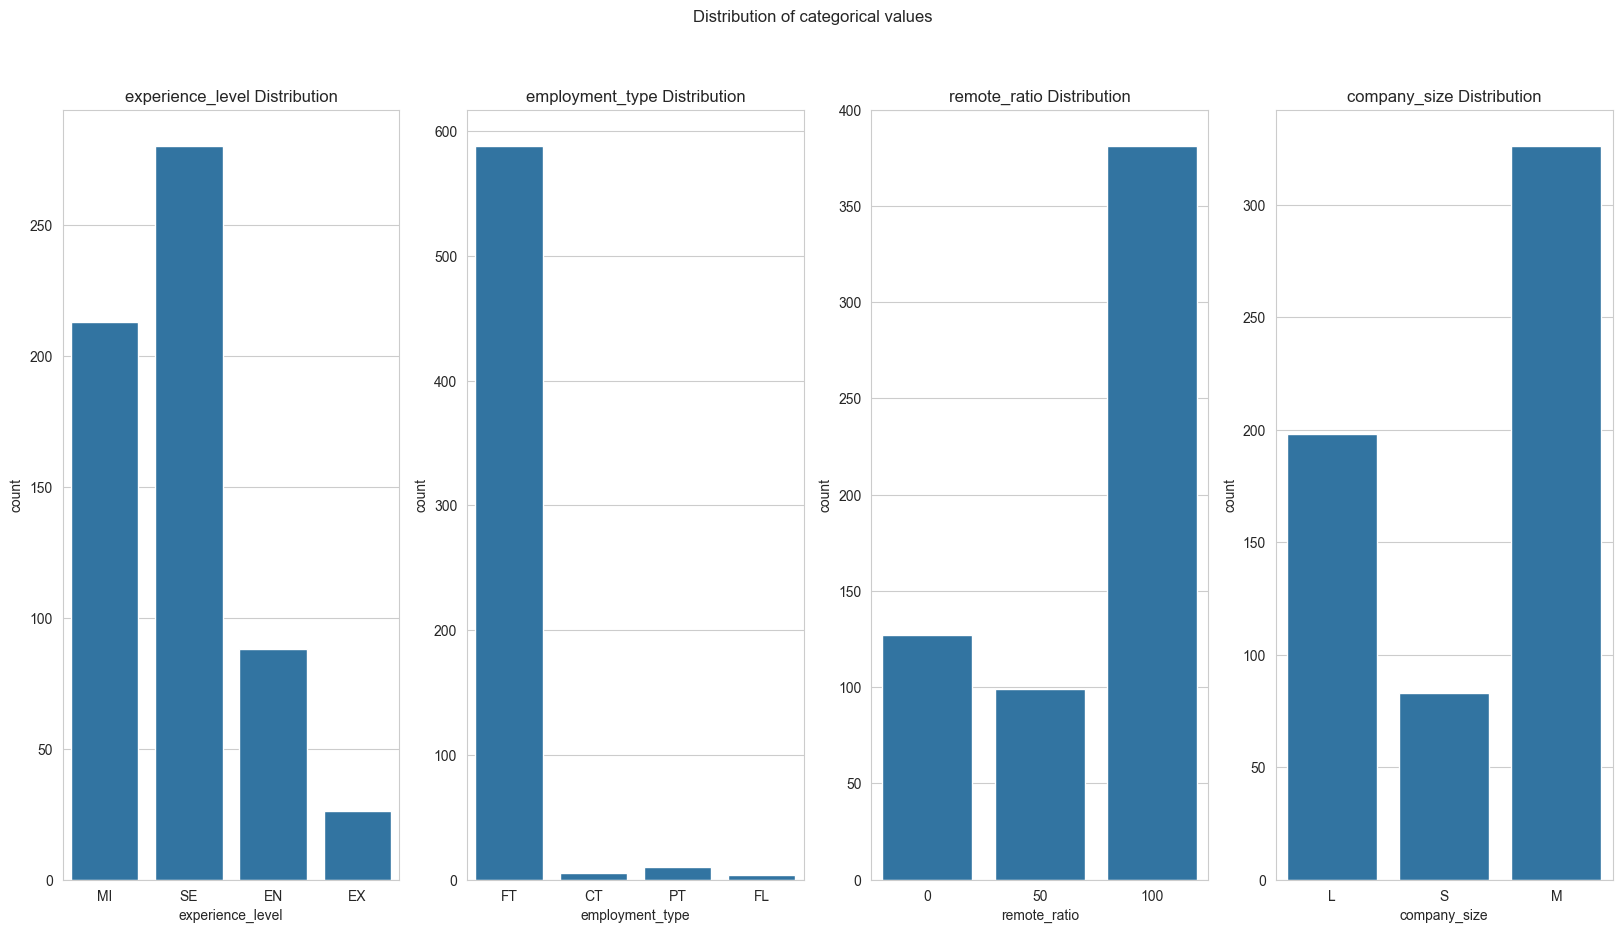

In [65]:
fig,ax = plt.subplots(1,4 , figsize=(20,10))
cat_data = ['experience_level','employment_type','remote_ratio','company_size']
for i , column in enumerate(cat_data):
    
    sns.countplot(data = df, x = column, ax=ax[i])
    ax[i].set_title(f'{column} Distribution')
    
fig.suptitle("Distribution of categorical values")
plt.show()

- senoirs are the most frequent job
- Full Time job is the most frequent type of job
- fully remote jobs are most frequent
- medium companies have Data Sceitists the most 

### Employment Type over Years

In [71]:
df['work_year'].unique()

array([2020, 2021, 2022], dtype=int64)

In [21]:
employment_type_in_Year = df.groupby(['work_year', 'employment_type']).size().reset_index(name='count')
employment_type_in_Year.head()

,work_year,employment_type,count
0,2020,CT,1
1,2020,FL,1
2,2020,FT,68
3,2020,PT,2
4,2021,CT,3


In [63]:

# Pivot the table to have employment_type as columns
# pivot_table = employment_type_in_Year.pivot(index='work_year', columns='employment_type', values='count').fillna(0)

# pivot_table.plot(kind='bar', stacked=True, figsize=(6,4))
# plt.title('Employment Type Distribution Over Years')
# plt.xlabel('Year')
# plt.ylabel('Number of People')
# plt.xticks(rotation=45)
# plt.legend(title='Employment Type')
# plt.show()

In [64]:

# Plot using seaborn
# plt.figure(figsize=(6, 4))
# sns.barplot(data=employment_type_in_Year, x='work_year', y='count', hue='employment_type')
# plt.title('Employment Type Distribution Over Years')
# plt.xlabel('Year')
# plt.ylabel('Number of People')
# plt.xticks(rotation=45)
# plt.legend(title='Employment Type')
# plt.show()

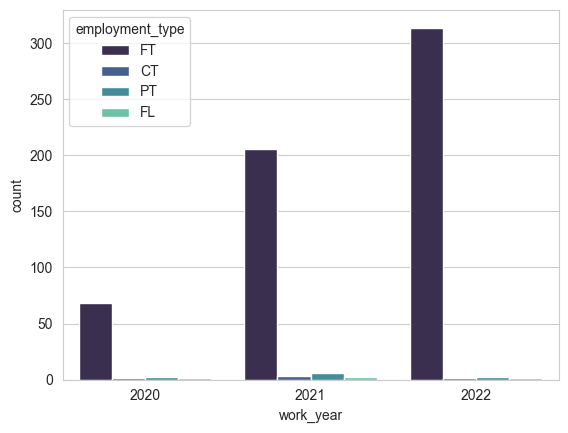

In [23]:
sns.countplot(data = df, x = 'work_year',hue = 'employment_type',palette = 'mako')
plt.show()

Full Time is the most worked job and it's increasing over the years

### Remote Ratio over Years

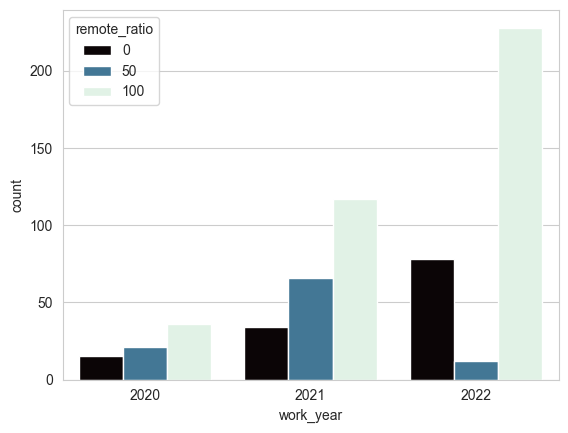

In [26]:
sns.countplot(data = df, x = 'work_year',hue = 'remote_ratio',palette = 'mako')
plt.show()

remote jobs are incerasing over the years (most people jobs in 2022 are fully remote)

### Salary Distribution by Remote Work Ratio

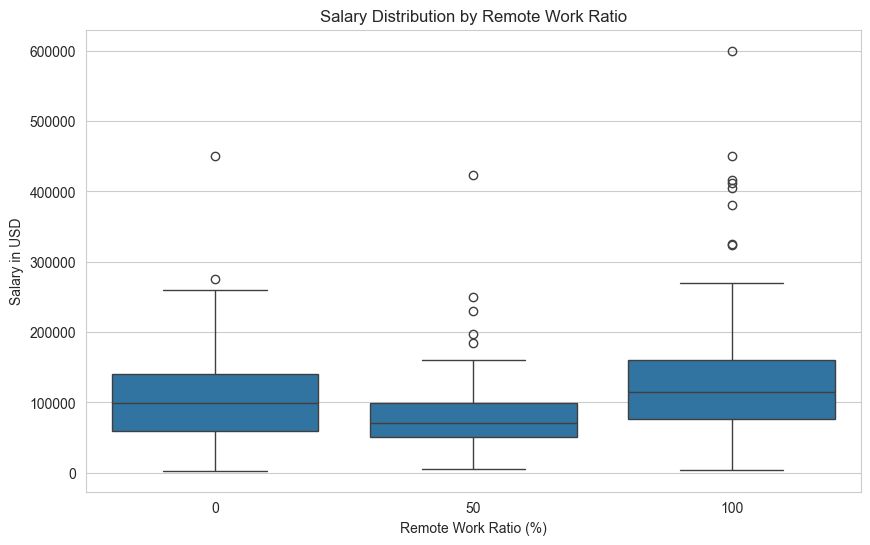

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd')
plt.title('Salary Distribution by Remote Work Ratio')
plt.xlabel('Remote Work Ratio (%)')
plt.ylabel('Salary in USD')
plt.show()

the most paid jobs are fully remote jobs

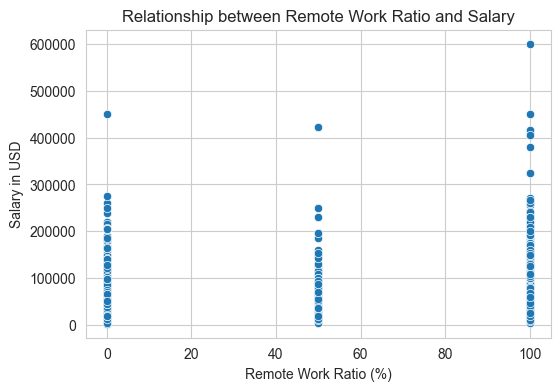

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='remote_ratio', y='salary_in_usd', )
plt.title('Relationship between Remote Work Ratio and Salary')
plt.xlabel('Remote Work Ratio (%)')
plt.ylabel('Salary in USD')
plt.show()

### jobs salaries

In [47]:
jobs_with_salaries= df.groupby(['job_title'])['salary_in_usd'].mean().reset_index()
jobs_with_salaries_sorted= jobs_with_salaries.sort_values(by='salary_in_usd',ascending=False).head(20)

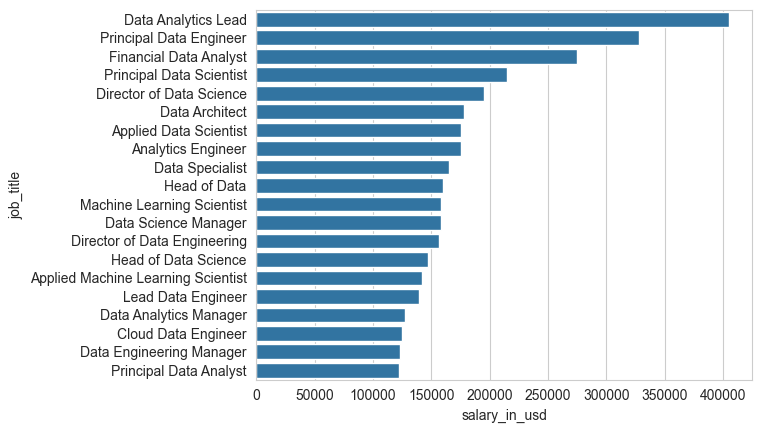

In [48]:
sns.barplot(data=jobs_with_salaries_sorted,y='job_title',x='salary_in_usd')
plt.show()

the most paid job is Data Analytics Lead

### Jobs Frequent

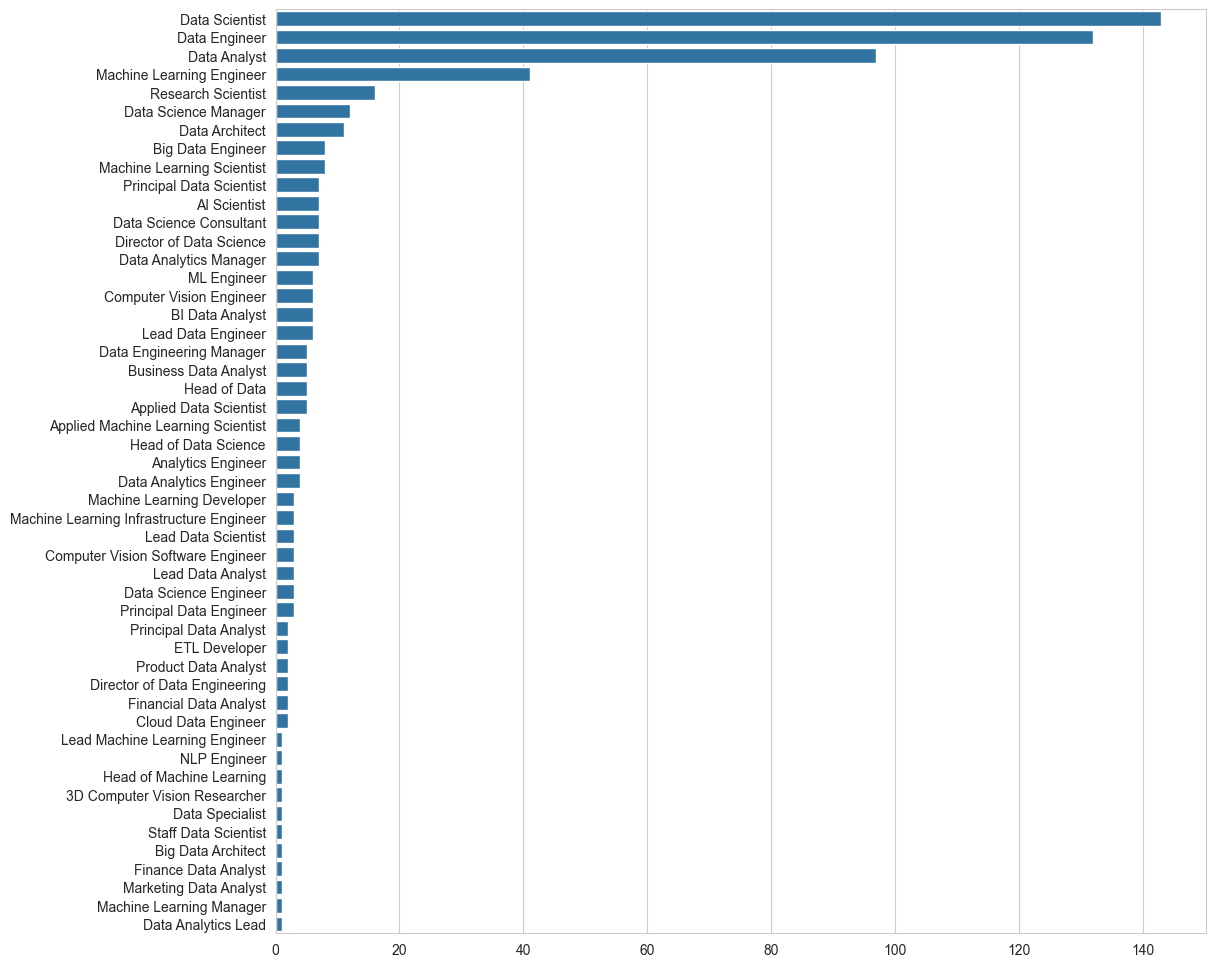

In [55]:
plt.figure(figsize=(12, 12))
# sns.histplot(data=df,y='job_title')
# plt.show()

## to show the data sorted
titles = df['job_title'].value_counts().keys().to_list()
count = df['job_title'].value_counts().values

sns.barplot(y =titles,x = count)
plt.show()

the most frequant jobs are Data Scientist, Data Engineer and Data Analytic

### Jobs Company Location

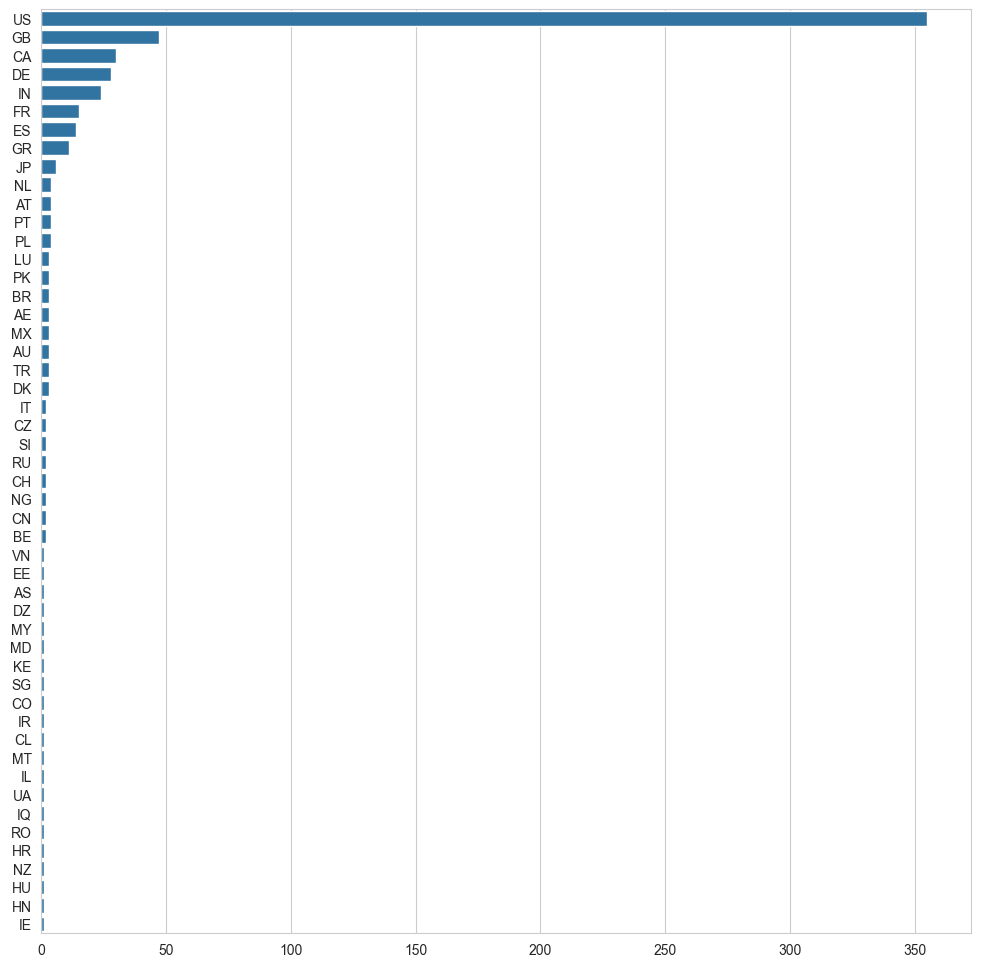

In [56]:
plt.figure(figsize=(12, 12))

## to show the data sorted
titles = df['company_location'].value_counts().keys().to_list()
location = df['company_location'].value_counts().values

sns.barplot(y =titles,x = location)
plt.show()

US is the most frequent country

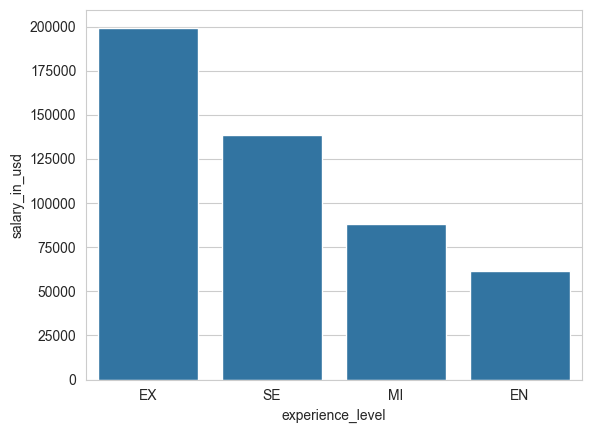

In [60]:
experience_with_salaries= df.groupby(['experience_level'])['salary_in_usd'].mean().reset_index()
experience_with_salaries_sorted= experience_with_salaries.sort_values(by='salary_in_usd',ascending=False).head(20)
sns.barplot(data=experience_with_salaries_sorted,x='experience_level',y='salary_in_usd')
plt.show()

High salary depends on experience 

### Remote Ratio by Experience level

<Axes: ylabel='remote_ratio'>

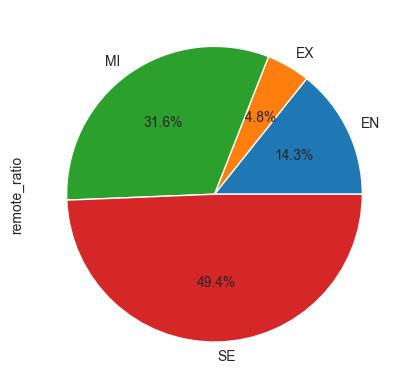

In [69]:
dat = df.groupby("experience_level")["remote_ratio"].sum()
dat.plot.pie(autopct="%4.1f%%")


Senoirs work remotly the most

### Jobs with Experience

In [92]:

avg_salary_by_job_exp = df.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean().reset_index()

most_paid_jobs = avg_salary_by_job_exp.loc[avg_salary_by_job_exp.groupby('experience_level')['salary_in_usd'].idxmax()]
most_paid_jobs

,job_title,experience_level,salary_in_usd
88,Machine Learning Scientist,EN,225000.0
95,Principal Data Engineer,EX,600000.0
61,Financial Data Analyst,MI,450000.0
33,Data Analytics Lead,SE,405000.0


In [97]:
avg_salary_by_job_exp = df.groupby(['experience_level'])['salary_in_usd'].mean().reset_index().sort_values(by='salary_in_usd')
avg_salary_by_job_exp

,experience_level,salary_in_usd
0,EN,61643.318182
2,MI,87996.056338
3,SE,138617.292857
1,EX,199392.038462


High salary depends on experience

### Colleration

In [73]:
df['remote_ratio'].corr(df['salary_in_usd'])

0.13212233539422105

In [79]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [101]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [103]:
# Drop columns with string values or convert them to numerical representations
df_numeric = df.drop(columns=['employee_residence','job_title', 'company_location','salary_currency', 'company_size','experience_level'])

experience_level_mapping = {'EN':1,'MI':2, 'SE':2,  'EX':4}
employment_type_mapping = {'CT':1, 'FL':2, 'PT':3, 'FT':4}
df_numeric['experience_level'] = df['experience_level'].map(experience_level_mapping)
df_numeric['employment_type'] = df['employment_type'].map(employment_type_mapping)
# df_numeric['employment_type'],_ = pd.factorize(df_numeric['employment_type'], sort=True)

df_numeric.head()

,work_year,employment_type,salary,salary_in_usd,remote_ratio,experience_level
0,2020,4,70000,79833,0,2
1,2020,4,260000,260000,0,2
2,2020,4,85000,109024,50,2
3,2020,4,20000,20000,0,2
4,2020,4,150000,150000,50,2


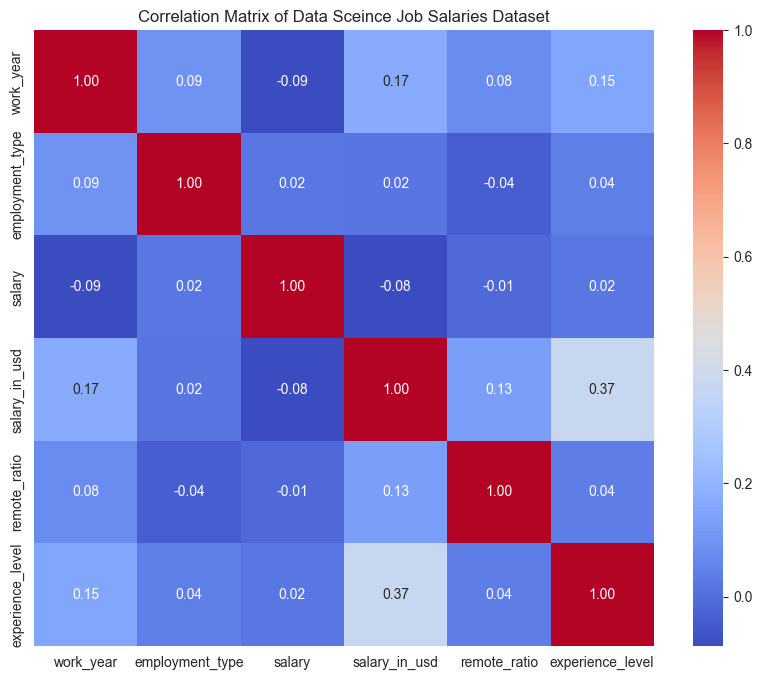

In [104]:
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Data Sceince Job Salaries Dataset')
plt.show()

There is a relation between: -  experience and salaries - work year and salaries - remote work and salary

### Summary


- The most demanded jobs in Data Science are for Senoirs
- The most demanded jobs are Data Scientist, Data Engineer and Data Analytic
- The highest salary job is Data Analytics Lead followed by Principle Data Engineer and Financial Data Analyst
- Fully remote jobs are increasing over the years
- Most companies are in US
- Fully remote jobs have the highest salaries
- Most Jobs are full time jobs
- Medium Companies Size (50-250 employees) have Data Sceince jobs the most
- High salary depends on experience